In [1]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
import cv2
from PIL import Image
import numpy as np
import numpy.random as nr
from vcopt import vcopt

In [2]:
img = Image.open('penguin2.jpeg')

In [3]:
img.size #check the image size

(202, 250)

In [4]:
img_resize = img.resize((101, 125))

In [5]:
img_resize = img_resize.save('re_pen2.jpg')

In [ ]:
import cv2

# 定数定義
ORG_WINDOW_NAME = "org"
GRAY_WINDOW_NAME = "pen2_gray"
CANNY_WINDOW_NAME = "pen2_canny"

ORG_FILE_NAME = "re_pen2.jpg"
GRAY_FILE_NAME = "pen2_gray.png"
CANNY_FILE_NAME = "pen2_canny.png"

# 元の画像を読み込む
org_img = cv2.imread(ORG_FILE_NAME, cv2.IMREAD_UNCHANGED)
# グレースケールに変換
gray_img = cv2.imread(ORG_FILE_NAME, cv2.IMREAD_GRAYSCALE)
# エッジ抽出
canny_img = cv2.Canny(gray_img, 50, 110)

# ウィンドウに表示
cv2.namedWindow(GRAY_WINDOW_NAME)
cv2.namedWindow(CANNY_WINDOW_NAME)

cv2.imshow(ORG_WINDOW_NAME, org_img)
cv2.imshow(GRAY_WINDOW_NAME, gray_img)
cv2.imshow(CANNY_WINDOW_NAME, canny_img)

# ファイルに保存
cv2.imwrite(GRAY_FILE_NAME, gray_img)
cv2.imwrite(CANNY_FILE_NAME, canny_img)

# 終了処理
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
img = np.array(Image.open('pen2_canny.png'))

In [8]:
print(img)
print(img.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(125, 101)


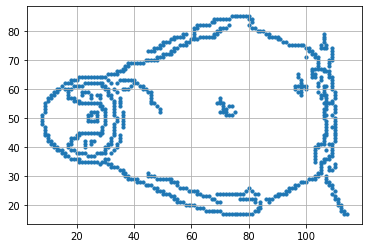

In [85]:
x = np.where(img==255)[0]
y = np.where(img==255)[1]
plt.scatter(x,y,s=10)
plt.grid()
plt.show()

In [90]:
x.shape[0]

699

[584 417 606 349 134 502 117 528 685 411 268 312 375  23 610 479 120 397
 161 408 689  65 696 695 104 372 400 259 587  47   8  59 570 261  56 361
 557 201 419  19 576 579 148 554 527 173 108 423 533 314 509 516  60 664
 636 273 412 242 311  57  81 189  35 310 550 459  69  41  16 517 619 472
   0 172 101  74 382 634  66 181 482 604 641 132 510 607 307  84 680 207
  85 363  13 392 559 467 185  92 139 306 538 553  50 600  61 223 449 678
 111 331 491 388 666 373 395 385 601 690  76 552 180 224 425 581 118 455
 362  68 646 486  34 289 187 693 648 426 119  82 329 305 617 107  17 441
 365 353  45 159 445 346  11  88 432 568 147 672 335 452 573 277 121  49
  31 500 233 333 675 274 635 364 116 488 285  95 609 304 414 262 247  62
 360 442 686 135 404 427 301 620 352 638 448  90 429 565  29 218 214 255
 293 343 248 439 484 524 160 440 299 577 103 659 146 347 286 165 493  80
 422 544 428 195   3 402   9 433 399 350 547 179 394 257 368 358 318 438
 599 241 197  40 512 546 377   5 453 245 374 483  3

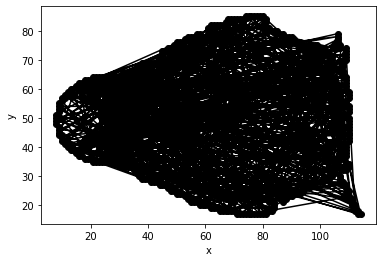

In [91]:
nr.seed(1)
num = x.shape[0]

#random 
para = np.arange(num)
nr.shuffle(para)
print(para)

#plot
plt.figure()
plt.plot(x[para], y[para], 'ok-')
plt.xlabel('x'); plt.ylabel('y')
plt.show()

In [66]:
def tsp_score(para):
    return np.sum(((x[para][:-1] - x[para][1:])**2 + (y[para][:-1] - y[para][1:])**2)**0.5)

In [94]:
#paraの可視化
def tsp_show_para(para, **info):
  #2-opt処理中の諸情報はinfoという辞書に格納されて渡されます
  #これらを受け取って使用することができます
    step_num = info['step_num']
    score = info['score']
    if (step_num%100)==0:
        #プロット（および保存）
        plt.figure()
        plt.plot(x[para], y[para], 'ok-')
        plt.xlabel('x'); plt.ylabel('y')
        plt.title('step={}, score={}'.format(step_num, score))
        plt.savefig('save/{}.png'.format(step_num))
        plt.show()
        print()

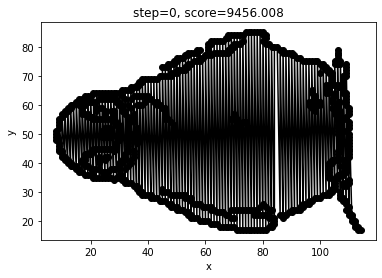

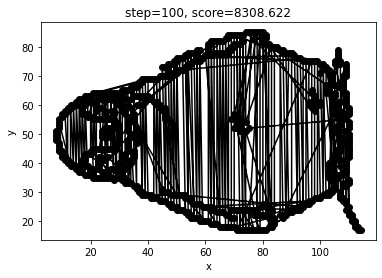

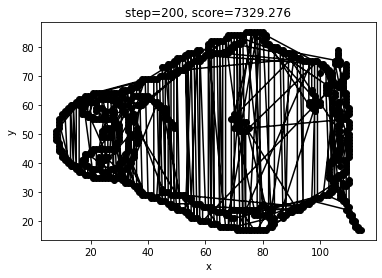

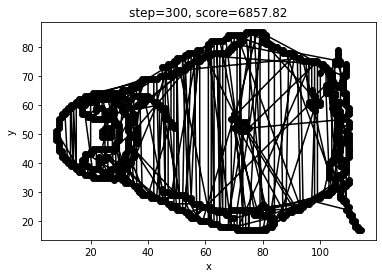

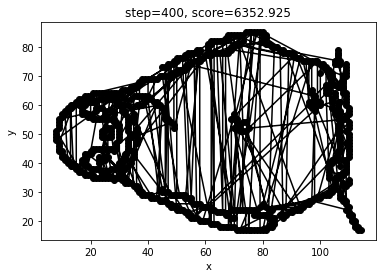

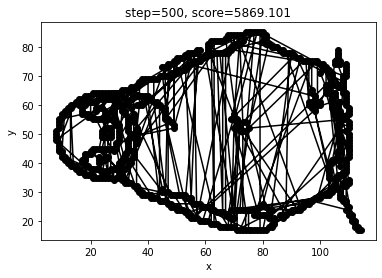

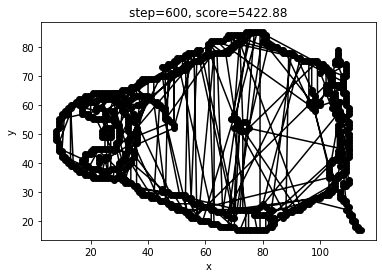

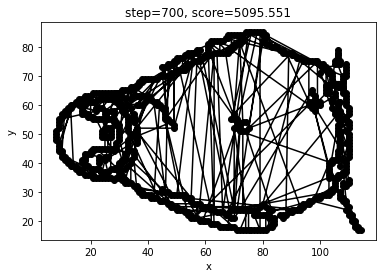

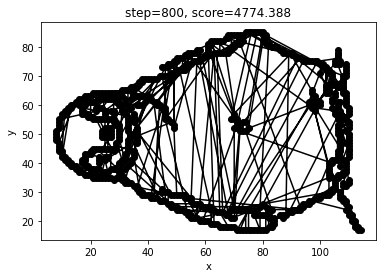

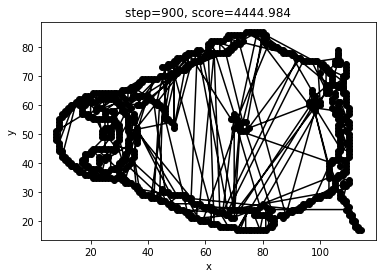

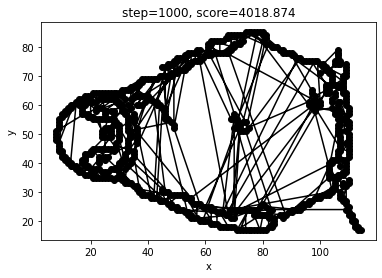

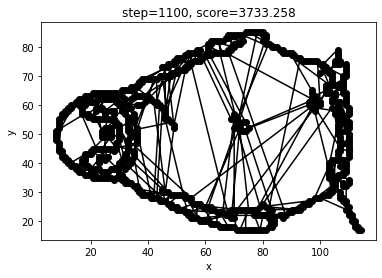

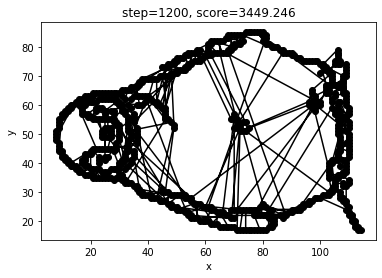

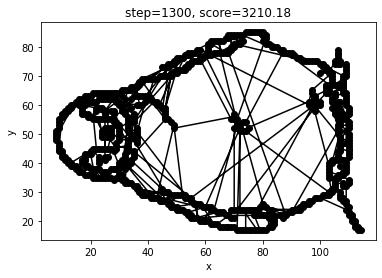

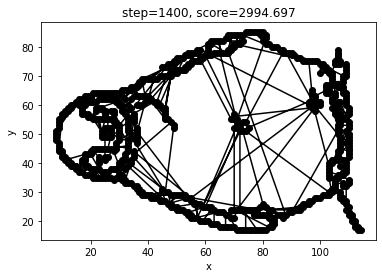

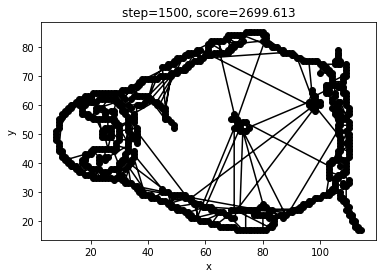

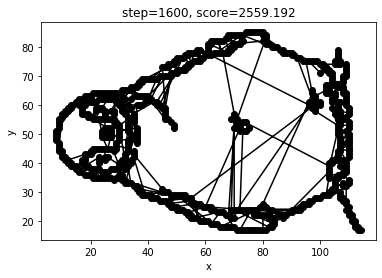

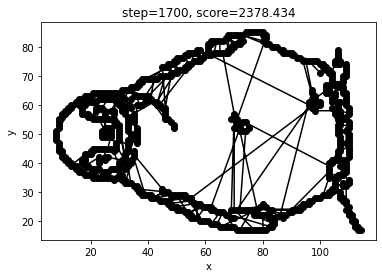

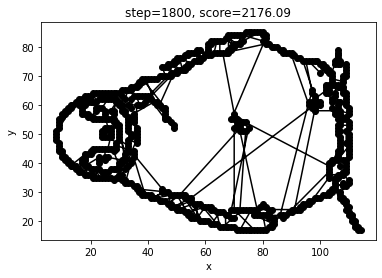

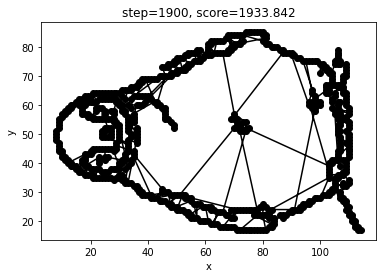

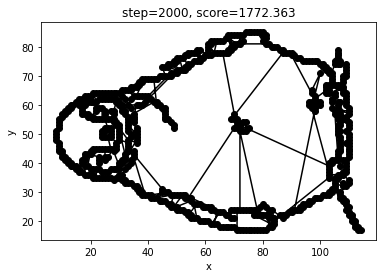

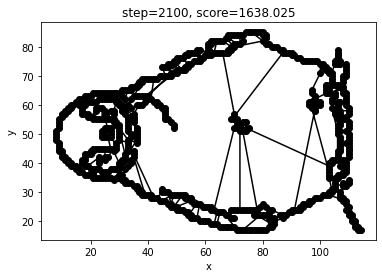

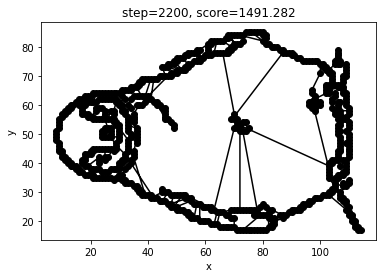

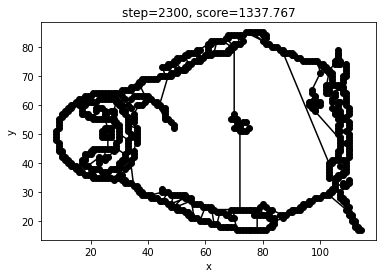

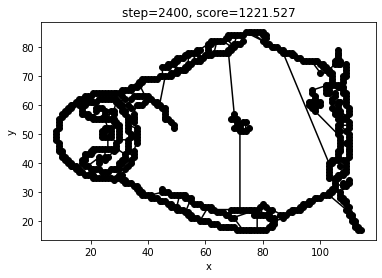

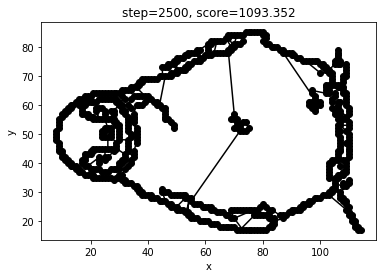


[539 562 575 574 573 572 586 571 561 548 547 546 523 522 531 530 534 529
 521 517 516 520 526 527 528 537 538 545 559 560 585 584 570 569 568 602
 603 629 601 600 583 582 599 624 598 597 596 622 595 621 620 619 618 617
 616 594 593 592 591 581 567 566 558 557 556 555 554 553 579 580 589 590
 614 637 638 651 652 615 653 654 639 655 675 676 677 678 679 656 680 681
 682 683 657 623 684 685 686 658 640 625 626 627 628 659 687 688 689 660
 661 662 663 664 641 642 643 630 604 605 644 645 646 665 666 667 668 669
 632 631 606 607 608 609 610 588 587 563 549 550 542 543 540 535 532 524
 518 513 511 508 505 503 500 501 497 495 492 493 489 487 486 482 478 471
 465 472 473 466 467 461 457 453 449 446 442 437 431 436 430 423 414 404
 405 415 398 424 416 406 399 393 389 385 381 380 384 388 392 397 396 413
 412 403 411 422 421 420 410 419 428 429 435 441 445 440 434 427 338 337
 342 346 351 356 359 362 370 369 375 379 383 387 391 395 401 408 402 409
 418 426 433 439 444 448 452 451 455 459 463 469 4

In [95]:
nr.seed(1)
num = x.shape[0]
#適当に道順を作成
para = np.arange(num)

#2-opt法で最適化
para, score = vcopt().opt2(para,                          #para
                           tsp_score,                     #score_func
                           0.0,                           #aim
                           show_para_func=tsp_show_para,  #show_para_func=None
                           seed=1)                        #seed=None

#結果の表示
print(para)
print(score)

NameError: name 'step_num' is not defined

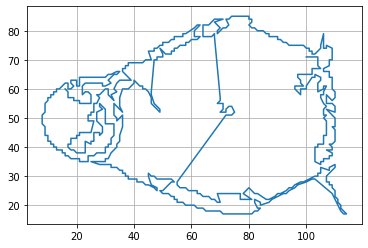

In [39]:
xpos = x[para]
ypos = y[para]
plt.plot(xpos, ypos)
plt.grid()
plt.show()

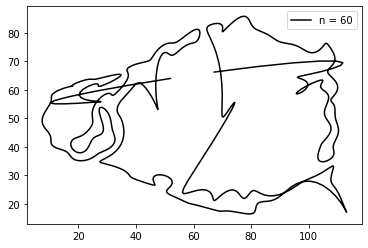

In [125]:
import numpy as np
import matplotlib.pyplot as plt

X = np.fft.fft(xpos)
Y = np.fft.fft(ypos)

nlim = 60 #The parameter

N = X.shape[0]
s = np.arange(0,N,1.0)
x_data = X[0] * np.cos(2*np.pi*0.0/N*s)/N
y_data = Y[0] * np.cos(2*np.pi*0.0/N*s)/N
for n in range(1,nlim+1):
    xan = (X[n] - X[N-n]) * (0.0 + 1.0j)
    xbn = (X[n] + X[N-n])
    yan = (Y[n] - Y[N-n]) * (0.0 + 1.0j)
    ybn = (Y[n] + Y[N-n])
    x_data = x_data + xan * np.sin(2*np.pi*n/N*s)/N + xbn * np.cos(2*np.pi*n/N*s)/N
    y_data = y_data + yan * np.sin(2*np.pi*n/N*s)/N + ybn * np.cos(2*np.pi*n/N*s)/N

plt.plot(np.real(x_data), np.real(y_data),label='n = '+str(nlim),color ='black')
plt.legend()
plt.show()